### `Confusion Matrix`

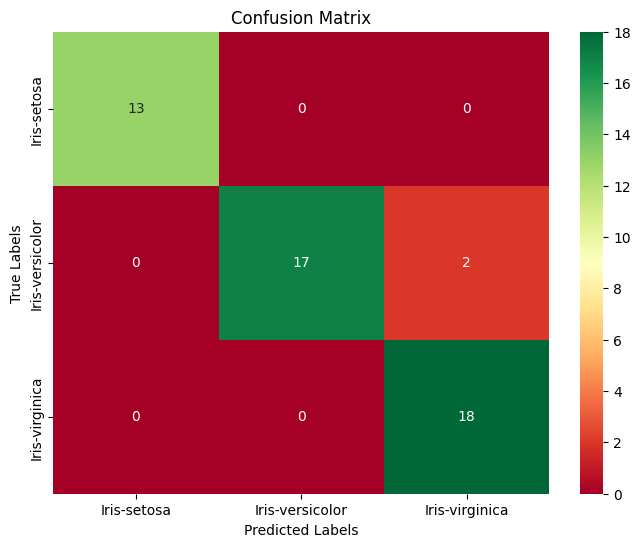

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  


# Load digits dataset
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")
# df = df.values
X = df.iloc[:,0:4]
y = df.iloc[:,4]
#Split data into train and test set. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7)
#Train Model
model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

#Construct the Confusion Matrix
labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
cm = confusion_matrix(y_test,pred)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_df,annot=True,fmt="d",cmap="RdYlGn")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


### `1. Accuracy`

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

In [35]:
iris =  load_iris()
X = iris.data
y = iris.target

In [36]:
# cross validation settings
kFold = KFold(n_splits=10)
model = LogisticRegression(max_iter=10000)

# evaluate model performance
results = cross_val_score(model,X,y,cv=kFold,scoring="accuracy")
print('Accuracy value with std: %.2f%% (%.2f)' % (results.mean()*100, results.std()))

Accuracy value with std: 94.67% (0.06)


In [37]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7)
#fit model
model.fit(X_train, y_train)
#accuracy on test set
result = model.score(X_test, y_test)
print("Accuracy - test set: %.2f%%" % (result*100.0))

Accuracy - test set: 92.00%


### `2. F1 Score`

In [43]:
from sklearn.metrics import precision_recall_fscore_support as score, precision_score, recall_score, f1_score

In [44]:
df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv")
data = df.values
X = data[:,:-1]
y = data[:,-1]

model = LogisticRegression(max_iter=10000)


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7)
model.fit(X_train, y_train)

pred = model.predict(X_test)
precision = precision_score(y_test, pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, pred)
print('Recall: %f' % recall)
# f1: tp / (tp + fp + fn)
f1 = f1_score(y_test, pred)
print('F1 score: %f' % f1)

Precision: 0.712121
Recall: 0.552941
F1 score: 0.622517


### `3. ROC-AUC Curve`

AUC - Test Set: 82.71%


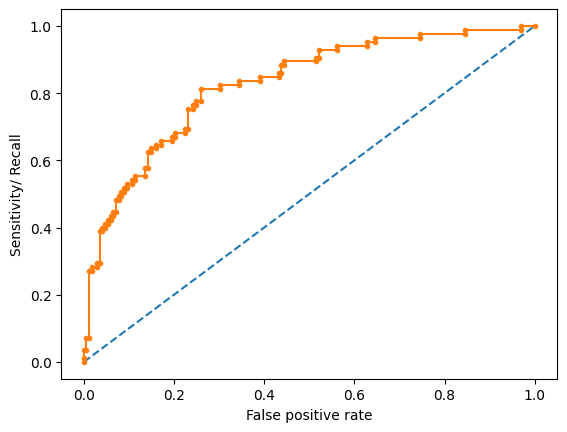

In [49]:
#Classification Area under curve
from sklearn import model_selection
from sklearn.metrics import roc_auc_score, roc_curve


dataframe = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv")
dat = dataframe.values
X = dat[:,:-1]
y = dat[:,-1]

#split data
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33, random_state=7)
model.fit(X_train, y_train)

# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

auc = roc_auc_score(y_test, probs)
print('AUC - Test Set: %.2f%%' % (auc*100))

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('Sensitivity/ Recall')
# show the plot
plt.show()

In [51]:
from sklearn.metrics import log_loss

In [52]:
df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv")
dat = df.values
X = dat[:,:-1]
y = dat[:,-1]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33, random_state=7)
model.fit(X_train, y_train)
#predict and compute logloss
pred = model.predict(X_test)
accuracy = log_loss(y_test, pred)
print("Logloss: %.2f" % (accuracy))

Logloss: 8.09
